# Import thư viện

In [163]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import RobustScaler, MinMaxScaler,StandardScaler

In [164]:
# Load data
df = pd.read_csv(r"E:\Gymcode\DA\DAP2304R1\tong ket\RoadSurfaceHouseTrading.csv")

In [165]:
# Đọc 5 dòng đầu tiên
df.head()

,Unnamed: 0,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,0,42.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,NaN,NaN,3.0,NaN,...,2250.0,53.571429,NaN,NaN,NaN,NaN,3.0,Mặt phố - Mặt đường,5e5501cbeb80a7245175e1ae,Phường Tây Mỗ
1,1,220.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,...,61000.0,277.272727,NaN,NaN,NaN,NaN,NaN,Mặt phố - Mặt đường,NaN,NaN
2,2,69.0,Đông-Nam,9.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,7.0,8.3,...,21000.0,304.347826,NaN,NaN,5e958ee8208d0d6d7648f98f,Đường Nguyễn Công Hoan,NaN,Mặt phố - Mặt đường,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
3,3,50.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,5.0,NaN,...,25000.0,500.000000,NaN,NaN,5e958ee8208d0d6d7648f9ac,Đường Trần Phú,NaN,Mặt phố - Mặt đường,5e5501cbeb80a7245175e0ec,Phường Kim Mã
4,4,72.0,NaN,5.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,5.0,6.0,...,12000.0,166.666667,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,60.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e4,Phường Cống Vị


# Chỉ lấy dữ liệu quận Hoàn Kiếm

In [166]:
# Kiểm tra Unique ten_quan
df['ten_quan'].unique()

array([nan, 'Quận Ba Đình', 'Ba Đình', 'Hà Đông', 'Quận Hà Đông',
       'Thị xã Sơn Tây', 'Huyện Ba Vì', 'Huyện Đan Phượng',
       'Huyện Hoài Đức', 'Huyện Quốc Oai', 'Huyện Thạch Thất',
       'Huyện Chương Mỹ', 'Huyện Thanh Oai', 'Huyện Thường Tín',
       'Thường Tín', 'Quận Hoàn Kiếm', 'Hoàn Kiếm', 'Tây Hồ',
       'Quận Tây Hồ', 'Quận Long Biên', 'Long Biên', 'Quận Cầu Giấy',
       'Cầu Giấy', 'Quận Đống Đa', 'Đống Đa', 'Quận Hai Bà Trưng',
       'Hai Bà Trưng', 'Hoàng Mai', 'Quận Hoàng Mai', 'Quận Thanh Xuân',
       'Thanh Xuân', 'Huyện Sóc Sơn', 'Huyện Đông Anh', 'Huyện Gia Lâm',
       'Quận Nam Từ Liêm', 'Nam Từ Liêm', 'Huyện Thanh Trì',
       'Quận Bắc Từ Liêm', 'Bắc Từ Liêm', 'Huyện Mê Linh'], dtype=object)

In [167]:
# Chỉ lấy ra quận Hoàn Kiếm
df_hk = df[(df['ten_quan']=='Hoàn Kiếm') | (df['ten_quan']=='Quận Hoàn Kiếm')]

In [168]:
# Lấy các cột cần thiết để phân tích
df_hk = df_hk[['dien_tich','phong_ngu','so_tang','mat_tien','so_do','lat','long','gia','gia_m2','do_rong_duong_ml']]

In [169]:
# Kiểm tra thông tin dữ liệu HK
df_hk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2767 entries, 11402 to 14168
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         2726 non-null   float64
 1   phong_ngu         1394 non-null   float64
 2   so_tang           1924 non-null   float64
 3   mat_tien          988 non-null    float64
 4   so_do             1686 non-null   object 
 5   lat               2767 non-null   float64
 6   long              2767 non-null   float64
 7   gia               2589 non-null   float64
 8   gia_m2            2573 non-null   float64
 9   do_rong_duong_ml  2666 non-null   object 
dtypes: float64(8), object(2)
memory usage: 237.8+ KB


In [170]:
# Thống kê dữ liệu
df_hk.describe()

,dien_tich,phong_ngu,so_tang,mat_tien,lat,long,gia,gia_m2
count,2726.000000,1394.000000,1924.000000,988.000000,2767.000000,2767.000000,2.589000e+03,2.573000e+03
mean,249.464710,11.684362,5.546258,9.033370,21.029838,105.850013,6.285638e+05,1.368988e+03
std,3488.737608,18.419439,3.113128,27.491111,0.006051,0.004400,1.702487e+07,2.125181e+04
min,0.000000,1.000000,1.000000,1.000000,20.979154,105.795726,3.300000e-02,9.545455e-07
25%,56.000000,3.000000,3.000000,4.500000,21.024658,105.846880,2.300000e+04,3.897059e+02
50%,100.000000,5.000000,5.000000,6.050000,21.031384,105.850047,4.550000e+04,5.573770e+02
75%,195.000000,10.000000,7.000000,9.075000,21.034260,105.853024,1.300000e+05,7.500000e+02
max,180000.000000,201.000000,26.000000,836.000000,21.043608,105.865727,7.890000e+08,7.890000e+05


## Chuyển đổi cột so_do và do_rong_duong

In [171]:
df['so_do'].unique()

array(['Giấy đỏ', 'Đã có sổ', 'Đã có sổ hồng', ...,
       'Sổ đỏ chính chủ, pháp lý rõ ràng, giao rịch ngay',
       'Sổ đỏ chính chủ, giấy phép xây dựng, pháp lý đầy đủ cất két, sẵn sàng giao dịch.',
       'Có sổ đẹp pháp lý rõ ràng'], dtype=object)

In [172]:
# Hàm chuyển đổi cột sổ đỏ
def convert_policy(_str):
    """
    _str: gia tri dau vao cua so hong so do
    return:
    1: co so hong so do
    0: ko co
    """
    if pd.isna(_str):
        return 0
    return 1

In [173]:
df['do_rong_duong_ml'].unique()

array(['Mặt phố - Mặt đường', 'Ngõ 4 ô tô trở lên', 'Ngõ 3 ô tô tránh',
       'Ngõ 1 ô tô', nan, 'Ngõ 4 ô tô tránh', 'Ngõ 2 ô tô tránh',
       'Ngõ ngách'], dtype=object)

In [174]:
# Hàm chuyển đổi độ rộng đường
def convert_street_width(_str):
    """
    mat pho mat duong:0,
    ngo ngach/ empty: 1
    ngo 1 oto:2
    ngo 2 oto:3
    ngo 3: 4
    ngo 4: 5
    ngo 5 oto tranh: 6

    """
    index_lst = ["Mặt phố - Mặt đường","Ngõ ngách", "Ngõ 1 ô tô", "Ngõ 2 ô tô tránh", "Ngõ 3 ô tô tránh", "Ngõ 4 ô tô tránh", "Ngõ 4 ô tô trở lên"]
    
    if pd.isna(_str):
        return 0
    elif(_str in index_lst):
        return index_lst.index(_str)

In [175]:
# xử lý dữ liệu cột sổ đỏ và độ rộng đường
df_hk["so_do"] = df_hk["so_do"].apply(lambda x: convert_policy (x))
df_hk["do_rong_duong_ml"] = df_hk["do_rong_duong_ml"].apply(lambda x: convert_street_width(x))

In [176]:
# Thống kê dữ liệu
df_hk.describe()

,dien_tich,phong_ngu,so_tang,mat_tien,so_do,lat,long,gia,gia_m2,do_rong_duong_ml
count,2726.000000,1394.000000,1924.000000,988.000000,2767.000000,2767.000000,2767.000000,2.589000e+03,2.573000e+03,2767.000000
mean,249.464710,11.684362,5.546258,9.033370,0.609324,21.029838,105.850013,6.285638e+05,1.368988e+03,0.223708
std,3488.737608,18.419439,3.113128,27.491111,0.487990,0.006051,0.004400,1.702487e+07,2.125181e+04,1.093351
min,0.000000,1.000000,1.000000,1.000000,0.000000,20.979154,105.795726,3.300000e-02,9.545455e-07,0.000000
25%,56.000000,3.000000,3.000000,4.500000,0.000000,21.024658,105.846880,2.300000e+04,3.897059e+02,0.000000
50%,100.000000,5.000000,5.000000,6.050000,1.000000,21.031384,105.850047,4.550000e+04,5.573770e+02,0.000000
75%,195.000000,10.000000,7.000000,9.075000,1.000000,21.034260,105.853024,1.300000e+05,7.500000e+02,0.000000
max,180000.000000,201.000000,26.000000,836.000000,1.000000,21.043608,105.865727,7.890000e+08,7.890000e+05,6.000000


# Chuyển đổi dữ liệu lat, long, so_do sang dạng category

In [177]:
cols = ['so_do','lat','long']
def convert_cat(df,cols):
    for col in cols:
        df[col] = df[col].astype("category")
convert_cat(df_hk,cols)

In [178]:
df_hk.head()

,dien_tich,phong_ngu,so_tang,mat_tien,so_do,lat,long,gia,gia_m2,do_rong_duong_ml
11402,105.0,NaN,6.0,NaN,0,21.026394,105.850047,58000.0,552.380952,0
11403,80.0,3.0,3.0,3.0,1,21.025228,105.842607,28000.0,350.000000,0
11404,80.0,3.0,3.0,3.0,1,21.025228,105.842607,28000.0,350.000000,0
11405,80.0,3.0,3.0,3.0,1,21.025228,105.842607,28000.0,350.000000,0
11406,40.0,2.0,4.0,NaN,1,21.033029,105.853024,24000.0,600.000000,3


In [179]:
df_hk.describe()

,dien_tich,phong_ngu,so_tang,mat_tien,gia,gia_m2,do_rong_duong_ml
count,2726.000000,1394.000000,1924.000000,988.000000,2.589000e+03,2.573000e+03,2767.000000
mean,249.464710,11.684362,5.546258,9.033370,6.285638e+05,1.368988e+03,0.223708
std,3488.737608,18.419439,3.113128,27.491111,1.702487e+07,2.125181e+04,1.093351
min,0.000000,1.000000,1.000000,1.000000,3.300000e-02,9.545455e-07,0.000000
25%,56.000000,3.000000,3.000000,4.500000,2.300000e+04,3.897059e+02,0.000000
50%,100.000000,5.000000,5.000000,6.050000,4.550000e+04,5.573770e+02,0.000000
75%,195.000000,10.000000,7.000000,9.075000,1.300000e+05,7.500000e+02,0.000000
max,180000.000000,201.000000,26.000000,836.000000,7.890000e+08,7.890000e+05,6.000000


In [180]:
#Kiểm tra giá trị khuyết thiếu của từng cột
df_hk.isnull().sum()/df_hk.shape[0]

dien_tich           0.014817
phong_ngu           0.496205
so_tang             0.304662
mat_tien            0.642935
so_do               0.000000
lat                 0.000000
long                0.000000
gia                 0.064330
gia_m2              0.070112
do_rong_duong_ml    0.000000
dtype: float64

In [181]:
# Điền giá trị khuyết thiếu của cột gia_m2 dựa vào cột diện tích và giá
mask = df_hk['dien_tich'].isnull() & ~df_hk['gia'].isnull()
df_hk.loc[mask, 'gia_m2'] = df_hk.loc[mask, 'dien_tich'] / df_hk.loc[mask, 'gia']

In [182]:
df_hk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2767 entries, 11402 to 14168
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   dien_tich         2726 non-null   float64 
 1   phong_ngu         1394 non-null   float64 
 2   so_tang           1924 non-null   float64 
 3   mat_tien          988 non-null    float64 
 4   so_do             2767 non-null   category
 5   lat               2767 non-null   category
 6   long              2767 non-null   category
 7   gia               2589 non-null   float64 
 8   gia_m2            2572 non-null   float64 
 9   do_rong_duong_ml  2767 non-null   int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 208.6 KB


In [183]:
df_hk.describe()

,dien_tich,phong_ngu,so_tang,mat_tien,gia,gia_m2,do_rong_duong_ml
count,2726.000000,1394.000000,1924.000000,988.000000,2.589000e+03,2.572000e+03,2767.000000
mean,249.464710,11.684362,5.546258,9.033370,6.285638e+05,1.369258e+03,0.223708
std,3488.737608,18.419439,3.113128,27.491111,1.702487e+07,2.125594e+04,1.093351
min,0.000000,1.000000,1.000000,1.000000,3.300000e-02,9.545455e-07,0.000000
25%,56.000000,3.000000,3.000000,4.500000,2.300000e+04,3.897059e+02,0.000000
50%,100.000000,5.000000,5.000000,6.050000,4.550000e+04,5.573770e+02,0.000000
75%,195.000000,10.000000,7.000000,9.075000,1.300000e+05,7.500000e+02,0.000000
max,180000.000000,201.000000,26.000000,836.000000,7.890000e+08,7.890000e+05,6.000000


# Điền giá trị khuyết thiếu So_Tang

<AxesSubplot: xlabel='so_tang', ylabel='dien_tich'>

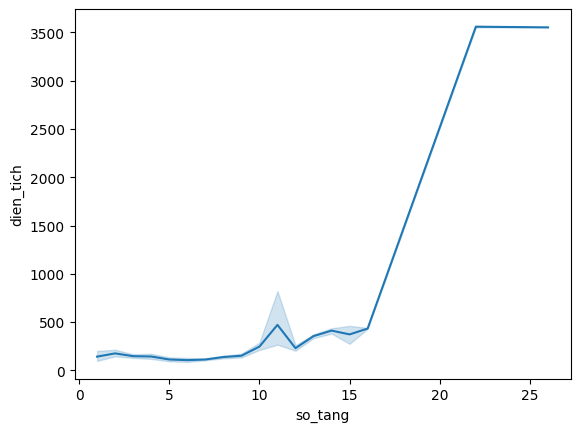

In [184]:
#Kiểm tra mối tương quan giữa diện tích và số tầng
sns.lineplot(x='so_tang', y='dien_tich', data=df_hk)
# Diện tích và số tầng có xu hướng tỷ lệ thuận với nhau

In [185]:
df_hk['so_tang'].unique()

array([ 6.,  3.,  4.,  2.,  5.,  8., 10., nan, 12.,  1.,  7.,  9., 15.,
       13., 11., 16., 14., 22., 26.])

In [186]:
# Chia cột "dien_tich" thành 6 phần
df_hk['dien_tich_phan'] = pd.qcut(df_hk['dien_tich'],q=4)

# Tính trung bình diện tích mặt tiền của mỗi phần
average_dien_tich_mat_tien = df_hk.groupby('dien_tich_phan')['so_tang'].mean()
average_dien_tich_mat_tien

dien_tich_phan
(-0.001, 56.0]       4.566929
(56.0, 100.0]        4.799615
(100.0, 195.0]       5.984375
(195.0, 180000.0]    7.102273
Name: so_tang, dtype: float64

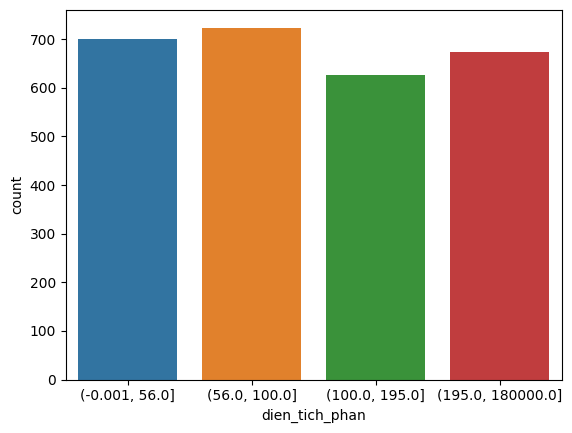

In [187]:
# xem số lượng chia theo từng phần
sns.countplot(x=df_hk['dien_tich_phan'])
plt.show()

In [188]:
"""
4 tầng: diện tích từ 0-45
5 tầng: diện tích từ 45-100
6 tầng: diện tích từ 100-151
7 tầng: diện tích trên 151
"""
fill_so_tang = lambda row: row['so_tang'] if not pd.isna(row['so_tang'])\
else (4 if (row['dien_tich'] >= 0 and row['dien_tich'] <= 45)\
else (5 if (row['dien_tich'] > 45 and row['dien_tich'] <= 100)\
else (6 if (row['dien_tich'] > 100 and row['dien_tich'] <= 151)\
else (7 if (row['dien_tich'] > 151)\
else row['so_tang'])))) if not pd.isna(row['dien_tich']) else row['so_tang']

In [189]:
# Áp dụng hàm lambda vào DataFrame
df_hk['so_tang'] = df_hk.apply(fill_so_tang, axis=1)

In [190]:
df_hk['so_tang'].unique()

array([ 6.,  3.,  4.,  2.,  5.,  8., 10., 12.,  1.,  7.,  9., 15., 13.,
       nan, 11., 16., 14., 22., 26.])

In [191]:
df_hk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2767 entries, 11402 to 14168
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   dien_tich         2726 non-null   float64 
 1   phong_ngu         1394 non-null   float64 
 2   so_tang           2735 non-null   float64 
 3   mat_tien          988 non-null    float64 
 4   so_do             2767 non-null   category
 5   lat               2767 non-null   category
 6   long              2767 non-null   category
 7   gia               2589 non-null   float64 
 8   gia_m2            2572 non-null   float64 
 9   do_rong_duong_ml  2767 non-null   int64   
 10  dien_tich_phan    2726 non-null   category
dtypes: category(4), float64(6), int64(1)
memory usage: 211.5 KB


# Điền giá trị khuyết thiếu cột Phong_ngu

<AxesSubplot: xlabel='so_tang', ylabel='phong_ngu'>

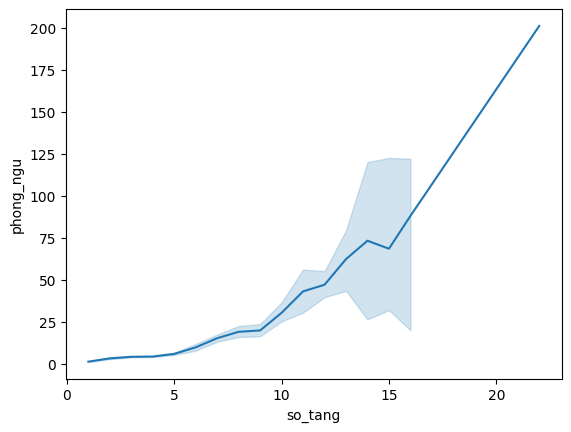

In [192]:
#Kiểm tra mối tương quan giữa phòng ngủ và số tầng
sns.lineplot(x='so_tang', y='phong_ngu', data=df_hk)

In [193]:
# xem trung bình số tầng theo diện tích
for i in range(1,27):
    try:
        df_hk_tang = df_hk[df_hk['so_tang']==i]
        print(f"{i} Tầng có số phòng ngủ TB: {round(df_hk_tang['phong_ngu'].mean())} Phòng")
    except ValueError:
        pass

1 Tầng có số phòng ngủ TB: 1 Phòng
2 Tầng có số phòng ngủ TB: 3 Phòng
3 Tầng có số phòng ngủ TB: 4 Phòng
4 Tầng có số phòng ngủ TB: 4 Phòng
5 Tầng có số phòng ngủ TB: 6 Phòng
6 Tầng có số phòng ngủ TB: 10 Phòng
7 Tầng có số phòng ngủ TB: 15 Phòng
8 Tầng có số phòng ngủ TB: 19 Phòng
9 Tầng có số phòng ngủ TB: 20 Phòng
10 Tầng có số phòng ngủ TB: 30 Phòng
11 Tầng có số phòng ngủ TB: 43 Phòng
12 Tầng có số phòng ngủ TB: 47 Phòng
13 Tầng có số phòng ngủ TB: 62 Phòng
14 Tầng có số phòng ngủ TB: 73 Phòng
15 Tầng có số phòng ngủ TB: 68 Phòng
16 Tầng có số phòng ngủ TB: 88 Phòng
22 Tầng có số phòng ngủ TB: 201 Phòng


In [194]:
#Điền số phòng ngủ dựa vào số tầng trung bình
# Ánh xạ số phòng sang số tầng
mapping = {1:1, 2:3, 3:4, 4:4, 5:6, 6:10, 7:15, 8:19, 9:20, 10:30, 11:43, 12:47, 13:62, 14:73, 15:68, 16:88, 22:201}

# Điền dữ liệu khuyết thiếu cho cột 'Số phòng' dựa vào số tầng
df_hk['phong_ngu'] = df_hk['phong_ngu'].fillna(df_hk['so_tang'].map(mapping))

In [195]:
df_hk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2767 entries, 11402 to 14168
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   dien_tich         2726 non-null   float64 
 1   phong_ngu         2732 non-null   float64 
 2   so_tang           2735 non-null   float64 
 3   mat_tien          988 non-null    float64 
 4   so_do             2767 non-null   category
 5   lat               2767 non-null   category
 6   long              2767 non-null   category
 7   gia               2589 non-null   float64 
 8   gia_m2            2572 non-null   float64 
 9   do_rong_duong_ml  2767 non-null   int64   
 10  dien_tich_phan    2726 non-null   category
dtypes: category(4), float64(6), int64(1)
memory usage: 211.5 KB


# Điền giá trị khuyết thiếu mat_tien

<AxesSubplot: xlabel='dien_tich', ylabel='mat_tien'>

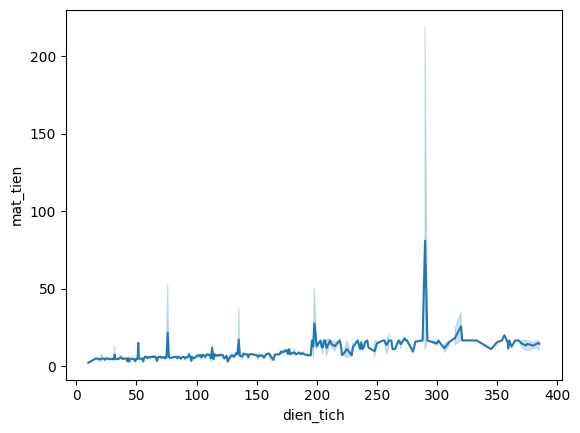

In [196]:
#Kiểm tra mối tương quan giữa diện tích và mặt tiền
sns.lineplot(x='dien_tich', y='mat_tien', data=clean)

In [197]:
# Chia cột "dien_tich" thành 4 phần
df_hk['dien_tich_phan'] = pd.qcut(df_hk['dien_tich'], q=4)

# Tính trung bình diện tích mặt tiền của mỗi phần
average_dien_tich_mat_tien = df_hk.groupby('dien_tich_phan')['mat_tien'].mean()
average_dien_tich_mat_tien

dien_tich_phan
(-0.001, 56.0]        4.942549
(56.0, 100.0]         5.919094
(100.0, 195.0]        7.764280
(195.0, 180000.0]    16.649490
Name: mat_tien, dtype: float64

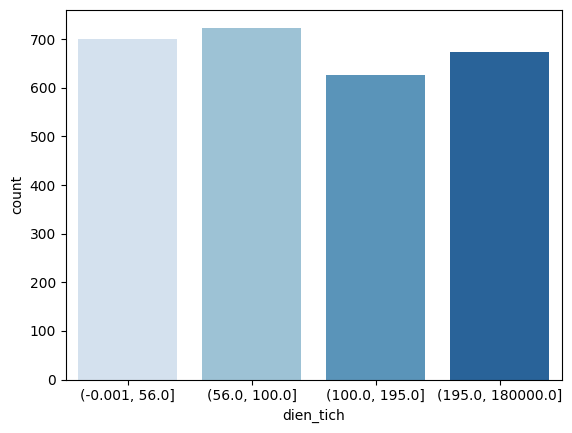

In [198]:
# xem số lượng chia theo từng phần
sns.countplot(data = df_hk, x=pd.qcut(df_hk['dien_tich'], q=4), palette="Blues")
plt.show()

In [199]:
# Định nghĩa hàm lambda để điền giá trị khuyết thiếu của cột "mat_tien" dựa trên cột "dien_tich"
fill_mat_tien = lambda row: row['mat_tien'] if not pd.isna(row['mat_tien'])\
else (4.9 if (row['dien_tich'] >= 0 and row['dien_tich'] <= 56)\
else (6.0 if (row['dien_tich'] > 56 and row['dien_tich'] <= 100)\
else (7.7 if (row['dien_tich'] > 100 and row['dien_tich'] <= 195)\
else (16.6 if (row['dien_tich'] > 195)\
else row['mat_tien'])))) if not pd.isna(row['dien_tich']) else row['mat_tien']

In [200]:
# Áp dụng hàm lambda vào DataFrame
df_hk['mat_tien'] = df_hk.apply(fill_mat_tien, axis=1)

In [201]:
df_hk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2767 entries, 11402 to 14168
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   dien_tich         2726 non-null   float64 
 1   phong_ngu         2732 non-null   float64 
 2   so_tang           2735 non-null   float64 
 3   mat_tien          2744 non-null   float64 
 4   so_do             2767 non-null   category
 5   lat               2767 non-null   category
 6   long              2767 non-null   category
 7   gia               2589 non-null   float64 
 8   gia_m2            2572 non-null   float64 
 9   do_rong_duong_ml  2767 non-null   int64   
 10  dien_tich_phan    2726 non-null   category
dtypes: category(4), float64(6), int64(1)
memory usage: 211.5 KB


In [202]:
# Xoá toàn bộ dữ liệu khuyết thiếu
df_hk1 = df_hk.copy()
df_hk1 = df_hk1.dropna()
df_hk1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 11402 to 14168
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   dien_tich         2553 non-null   float64 
 1   phong_ngu         2553 non-null   float64 
 2   so_tang           2553 non-null   float64 
 3   mat_tien          2553 non-null   float64 
 4   so_do             2553 non-null   category
 5   lat               2553 non-null   category
 6   long              2553 non-null   category
 7   gia               2553 non-null   float64 
 8   gia_m2            2553 non-null   float64 
 9   do_rong_duong_ml  2553 non-null   int64   
 10  dien_tich_phan    2553 non-null   category
dtypes: category(4), float64(6), int64(1)
memory usage: 196.9 KB


# Xử lý dữ liệu ngoại lai

In [203]:
df_hk1.describe()

,dien_tich,phong_ngu,so_tang,mat_tien,gia,gia_m2,do_rong_duong_ml
count,2553.000000,2553.000000,2553.000000,2553.000000,2.553000e+03,2.553000e+03,2553.000000
mean,178.289659,11.261261,5.511555,8.656353,6.339986e+05,1.371298e+03,0.242460
std,557.979235,15.039013,2.585975,17.385118,1.714423e+07,2.133412e+04,1.136271
min,5.000000,1.000000,1.000000,1.000000,3.300000e-02,9.545455e-07,0.000000
25%,55.000000,4.000000,4.000000,4.900000,2.300000e+04,3.897059e+02,0.000000
50%,98.000000,6.000000,5.000000,6.000000,4.550000e+04,5.573770e+02,0.000000
75%,188.000000,15.000000,7.000000,8.600000,1.300000e+05,7.500000e+02,0.000000
max,25000.000000,201.000000,22.000000,836.000000,7.890000e+08,7.890000e+05,6.000000


In [204]:
# Hàm giá lọc giá trị ngoại lai
def get_Q1_Q3(values):
    values = np.array(values)
    q1 = np.quantile(values, 0.25)
    q3 = np.quantile(values, 0.75)
    IQR = q3-q1 
    _min_value = q1 -  1.5*IQR 
    _max_value = q3 +  1.5*IQR 

    return _min_value, _max_value

In [205]:
# Xử lý ngoại lai
min_price, max_price = get_Q1_Q3(df_hk1["phong_ngu"])

min_price, max_price = get_Q1_Q3(df_hk1["so_tang"])

min_mat_tien, max_mat_tien = get_Q1_Q3(df_hk1["mat_tien"])

min_price, max_price = get_Q1_Q3(df_hk1["gia_m2"])

min_dt, max_dt = get_Q1_Q3(df_hk1["dien_tich"])
# target = target[target["gia_m2"]>=min_price & target["gia_m2"]<= max_price]


logic = ((df_hk1["phong_ngu"]>=min_price) & (df_hk1["phong_ngu"]<= max_price) & \
         (df_hk1["so_tang"]>=min_price) & (df_hk1["so_tang"]<= max_price) & \
         (df_hk1["mat_tien"]>=min_price) & (df_hk1["mat_tien"]<= max_price) & \
         (df_hk1["gia_m2"]>=min_price) & (df_hk1["gia_m2"]<= max_price) & \
         (df_hk1["dien_tich"]>=min_dt) & (df_hk1["dien_tich"]<= max_dt))

clean = df_hk1[logic]

In [206]:
clean = clean[['dien_tich', 'phong_ngu', 'so_tang', 'mat_tien', 'so_do', 'lat', 'long',
       'gia', 'gia_m2', 'do_rong_duong_ml']]

In [207]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262 entries, 11402 to 14168
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   dien_tich         2262 non-null   float64 
 1   phong_ngu         2262 non-null   float64 
 2   so_tang           2262 non-null   float64 
 3   mat_tien          2262 non-null   float64 
 4   so_do             2262 non-null   category
 5   lat               2262 non-null   category
 6   long              2262 non-null   category
 7   gia               2262 non-null   float64 
 8   gia_m2            2262 non-null   float64 
 9   do_rong_duong_ml  2262 non-null   int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 174.6 KB


# Vẽ biểu đồ xem gia_m2 với các cột khác

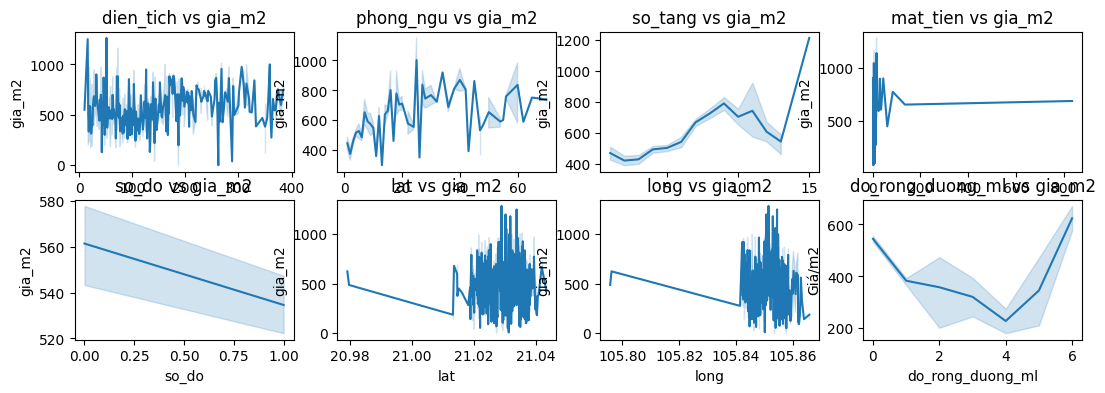

In [208]:
cols = ['dien_tich', 'phong_ngu', 'so_tang', 'mat_tien', 'so_do', 'lat', 'long', 'do_rong_duong_ml']
n_rows = 2
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_rows*6.5, n_cols*1))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r * n_cols + c # index để lặp tới các cột
        if i<len(cols):
            ax_i = ax[r,c]
            sns.lineplot(x=cols[i], y='gia_m2', data=clean, ax=ax_i)
            ax_i.set_title(f'{cols[i]} vs gia_m2')
            plt.ylabel('Giá/m2')

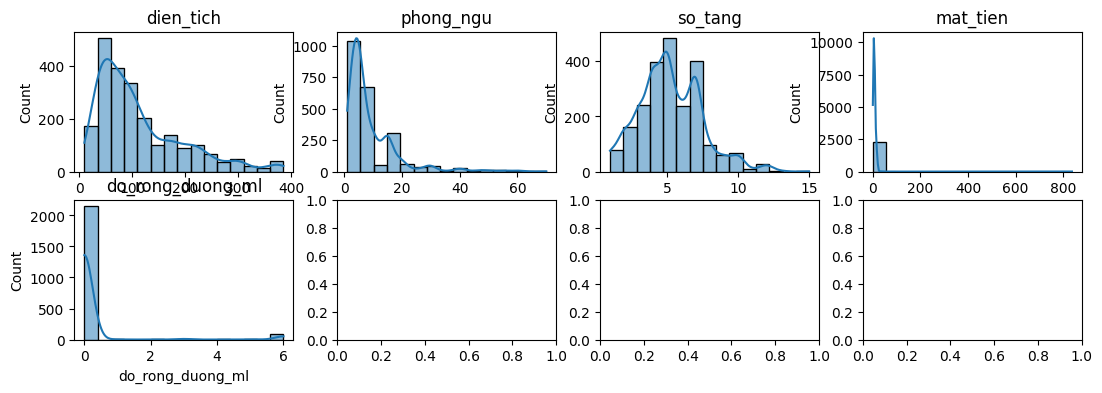

In [209]:
cols = ['dien_tich', 'phong_ngu', 'so_tang', 'mat_tien', 'do_rong_duong_ml']
n_rows = 2
n_cols = 4
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_rows*6.5, n_cols*1))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r * n_cols + c # index để lặp tới các cột
        if i<len(cols):
            ax_i = ax[r,c]
            sns.histplot(data=clean,x=cols[i],bins=15,kde=True, ax=ax_i)
            ax_i.set_title(f'{cols[i]}')

# Nomalize dữ liệu

In [226]:
clean.columns

Index(['dien_tich', 'phong_ngu', 'so_tang', 'mat_tien', 'so_do', 'lat', 'long',
       'gia', 'gia_m2', 'do_rong_duong_ml'],
      dtype='object')

In [210]:
# Cột mong muốn để normalize
columns_to_normalize = ['dien_tich', 'phong_ngu', 'so_tang', 'mat_tien','gia', 'gia_m2', 'do_rong_duong_ml']

# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Normalize các cột mong muốn
data_normalized = clean.copy()
data_normalized[columns_to_normalize] = scaler.fit_transform(clean[columns_to_normalize])

# Mô hình hoá dữ liệu

In [211]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Sử dụng LinerRegression với data clean

In [212]:
# # split data clean
X = clean[['dien_tich', 'phong_ngu', 'so_tang', 'mat_tien', 'so_do', 'lat', 'long','do_rong_duong_ml']]
y = clean["gia_m2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [213]:
#Fit mô hình
from sklearn.linear_model import LogisticRegression
model_reg = linear_model.LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

In [214]:
y_pred = model_reg.predict(X_test)
mse = mean_absolute_error(y_pred, y_test)
mape = mean_absolute_percentage_error(y_pred, y_test)
print(mse)
print(mape)

187.73713664922553
0.35476469418707923


# Sử dụng LinerRegression với data Nomalize

In [215]:
# split data df_s
X_s = data_normalized[['dien_tich', 'phong_ngu', 'so_tang', 'mat_tien', 'so_do', 'lat', 'long','do_rong_duong_ml']]
y_s = data_normalized["gia_m2"]
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.3, random_state=42)

In [216]:
#Fit mô hình
model_s_reg = linear_model.LinearRegression()
model_s_reg.fit(X_s_train, y_s_train)

LinearRegression()

In [217]:
y_s_pred = model_reg.predict(X_s_test)
mse_s = mean_absolute_error(y_s_pred, y_s_test)
mape_s = mean_absolute_percentage_error(y_s_pred, y_s_test)
print(mse_s)
print(mape_s)

352.20000980714735
0.9988049201783873


# Sử dụng RandomForest với data Clean

In [218]:
# split data clean
X_rf = clean[['dien_tich', 'phong_ngu', 'so_tang', 'mat_tien', 'so_do', 'lat', 'long','do_rong_duong_ml']]
y_rf = clean["gia_m2"]
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

In [219]:
#Fit mô hình
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
model_rf_reg = RandomForestRegressor(random_state=0)
model_rf_reg.fit(X_rf_train, y_rf_train)

RandomForestRegressor(random_state=0)

In [220]:
y_rf_pred = model_reg.predict(X_rf_test)
mse_rf = mean_absolute_error(y_rf_pred, y_rf_test)
mape_rf = mean_absolute_percentage_error(y_rf_pred, y_rf_test)
print(mse_rf)
print(mape_rf)

187.73713664922553
0.35476469418707923


In [221]:
model_rf_reg.score(X_rf_test, y_rf_test)

0.5251543001879377